<a href="https://colab.research.google.com/github/SalmaSherif7070/KNN-from-scratch/blob/main/A1_%7C_KNN_from_scratch_%7CSalma_Sherif_202200622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read & prepare Dataframs

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


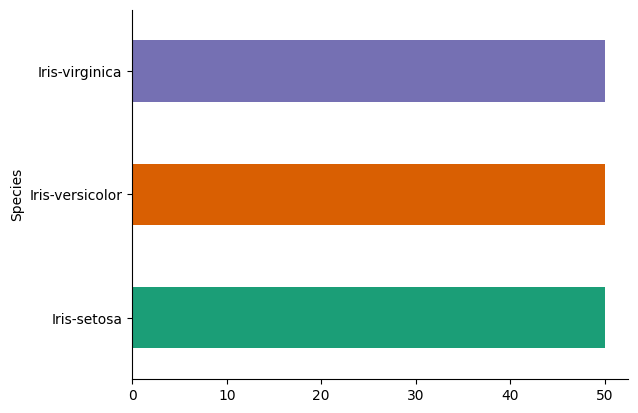

In [ ]:
# @title Species

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['Iris-virginica'] = (df['Species'] == 'Iris-virginica').astype(int)
df['Iris-versicolor'] = (df['Species'] == 'Iris-versicolor').astype(int)
df['Iris-setosa'] = (df['Species'] == 'Iris-setosa').astype(int)

In [ ]:
# Step 3

train,test= train_test_split(df ,test_size=0.2, random_state=42)
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-virginica,Iris-versicolor,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa,0,0,1
15,16,5.7,4.4,1.5,0.4,Iris-setosa,0,0,1
65,66,6.7,3.1,4.4,1.4,Iris-versicolor,0,1,0
11,12,4.8,3.4,1.6,0.2,Iris-setosa,0,0,1
42,43,4.4,3.2,1.3,0.2,Iris-setosa,0,0,1
...,...,...,...,...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3,Iris-versicolor,0,1,0
106,107,4.9,2.5,4.5,1.7,Iris-virginica,1,0,0
14,15,5.8,4.0,1.2,0.2,Iris-setosa,0,0,1
92,93,5.8,2.6,4.0,1.2,Iris-versicolor,0,1,0


# PCA & Visualization

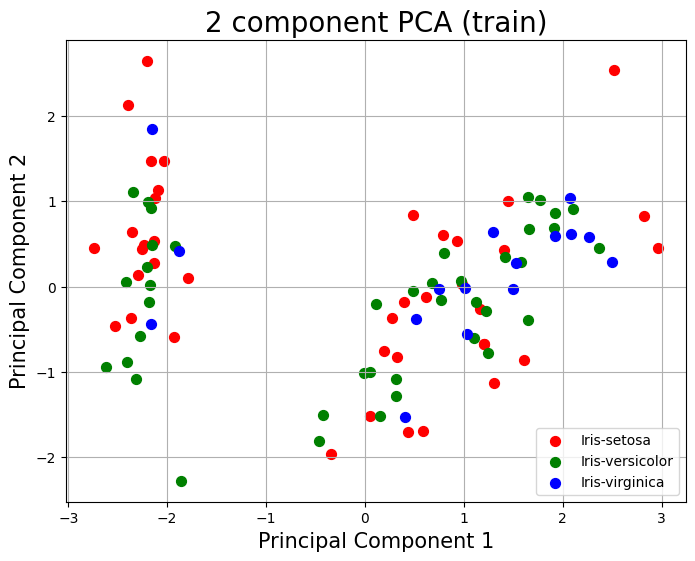

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = train.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Final DataFrame with PCA components
finalDf = pd.concat([principalDf, train[['Species']]], axis=1)

# Plotting the results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA (train)', fontsize=20)
targets = train['Species'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
               finalDf.loc[indicesToKeep, 'Principal Component 2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()
plt.show()


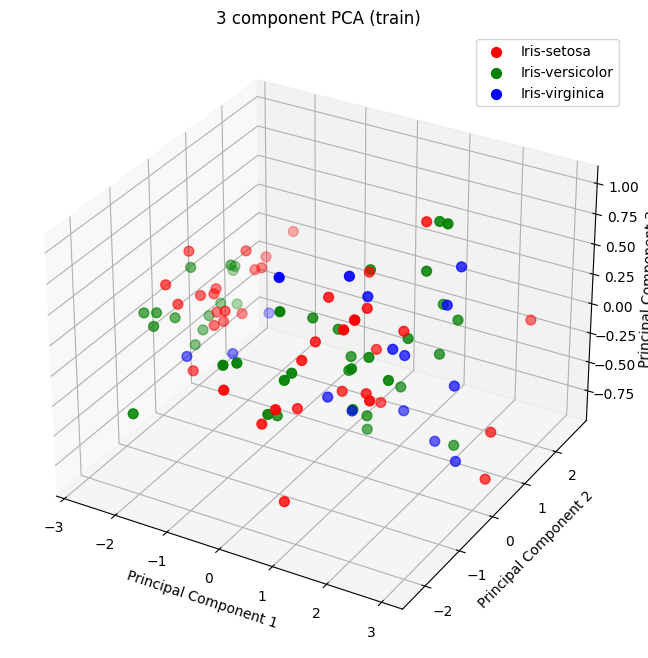

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Separating out the features
x = train.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Final DataFrame with PCA components
finalDf = pd.concat([principalDf, train[['Species']]], axis=1)

# Plotting the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = train['Species'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
               finalDf.loc[indicesToKeep, 'Principal Component 2'],
               finalDf.loc[indicesToKeep, 'Principal Component 3'],
               c=color,
               s=50)
ax.legend(targets)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3 component PCA (train)')
plt.show()

In [ ]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Manual KNN

In [ ]:
def KNN (k):
  min_k_distances_with_species = []

  for i in range(len(test)):
      step = []
      for j in range(len(train)):
          distance = ((test['SepalLengthCm'][i] - train['SepalLengthCm'][j])**2 +
                      (test['SepalWidthCm'][i] - train['SepalWidthCm'][j])**2 +
                      (test['PetalLengthCm'][i] - train['PetalLengthCm'][j])**2 +
                      (test['PetalWidthCm'][i] - train['PetalWidthCm'][j])**2 +
                      (test['Iris-setosa'][i] - train['Iris-setosa'][j])**2 +
                      (test['Iris-virginica'][i] - train['Iris-virginica'][j])**2 +
                      (test['Iris-versicolor'][i] - train['Iris-versicolor'][j])**2)
          step.append([distance, train['Species'][j]])

      #Sort
      sorted_step = sorted(step, key=lambda x: x[0])

      #Get the minimum 5
      min_k_with_species = sorted_step[:k]
      min_k_distances_with_species.append(min_k_with_species)

  most_repeated_speeches = []

  for sample_distances in min_k_distances_with_species:
      species_count = {}
      for _, species in sample_distances:
          if species in species_count:
              species_count[species] += 1
          else:
              species_count[species] = 1

      most_common_species = max(species_count, key=species_count.get)
      most_repeated_speeches.append(most_common_species)

  return most_repeated_speeches

# Accuracy

In [ ]:
def cal_accuracy(most_repeated_speeches):
  accuracy=0
  for i in range(len(test)):
    if(test['Species'][i]==most_repeated_speeches[i]):
      accuracy+=1
  print((accuracy/len(test))*100,"%")

In [ ]:
cal_accuracy(KNN(3))
cal_accuracy(KNN(5))
cal_accuracy(KNN(7))

100.0 %
100.0 %
100.0 %


# Normalization

In [ ]:
for i in range(1, 5):
    mean = np.mean(df.iloc[:, i])
    std = np.std(df.iloc[:, i])
    for j in range(len(df)):
        df.iloc[:, i][j] = (df.iloc[:, i][j] - mean) / std

# Normalized df
df

<ipython-input-29-ecb24ef96614>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, i][j] = (df.iloc[:, i][j] - mean) / std


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-virginica,Iris-versicolor,Iris-setosa
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa,0,0,1
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa,0,0,1
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa,0,0,1
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa,0,0,1
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa,0,0,1
...,...,...,...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica,1,0,0
146,147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica,1,0,0
147,148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica,1,0,0
148,149,0.432165,0.800654,0.933356,1.447956,Iris-virginica,1,0,0


In [ ]:
cal_accuracy(KNN(3))
cal_accuracy(KNN(5))
cal_accuracy(KNN(7))

100.0 %
100.0 %
100.0 %


# KNN by library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def KNN2(train_df, test_df, k):
    # Features and target variable for training data
    X_train = train_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    y_train = train_df['Species']

    # Features for test data
    X_test = test_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the species for test data
    y_pred = knn.predict(X_test)

    return y_pred

In [ ]:
def cal_accuracy2(test_df, y_pred):
    correct = (test_df['Species'] == y_pred).sum()
    total = len(test_df)
    accuracy = (correct / total) * 100
    print(f'Accuracy: {accuracy:.2f}%')

In [ ]:
cal_accuracy2(test, KNN2(train, test, 3))
cal_accuracy2(test, KNN2(train, test, 5))
cal_accuracy2(test, KNN2(train, test, 7))

Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 96.67%
